In [81]:
!pip install pandas
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\ADMIN\\Desktop\\user_behavior_dataset.csv")
print(df)

     User ID        Device Model Operating System  App Usage Time (min/day)  \
0          1      Google Pixel 5          Android                       393   
1          2           OnePlus 9          Android                       268   
2          3        Xiaomi Mi 11          Android                       154   
3          4      Google Pixel 5          Android                       239   
4          5           iPhone 12              iOS                       187   
..       ...                 ...              ...                       ...   
695      696           iPhone 12              iOS                        92   
696      697        Xiaomi Mi 11          Android                       316   
697      698      Google Pixel 5          Android                        99   
698      699  Samsung Galaxy S21          Android                        62   
699      700           OnePlus 9          Android                       212   

     Screen On Time (hours/day)  Battery Drain (mAh

In [11]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [17]:
print(df.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

In [19]:
df.isnull()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False


In [21]:
!pip install scikit-learn

In [61]:
import numpy as np
import matplotlib.pyplot as plt


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [67]:
print (df['User Behavior Class'].value_counts())


User Behavior Class
2    146
3    143
4    139
5    136
1    136
Name: count, dtype: int64


In [69]:
print(df['Gender'].value_counts())


Gender
1    364
0    336
Name: count, dtype: int64


In [71]:
# Correlation matrix for feature importance
correlation_matrix=df.corr()
print(correlation_matrix)

                             User ID  Device Model  Operating System  \
User ID                     1.000000     -0.006788          0.005359   
Device Model               -0.006788      1.000000          0.707477   
Operating System            0.005359      0.707477          1.000000   
App Usage Time (min/day)   -0.024957      0.021657          0.031577   
Screen On Time (hours/day) -0.014287      0.035581          0.026470   
Battery Drain (mAh/day)    -0.019377      0.040976          0.040361   
Number of Apps Installed   -0.023914      0.029720          0.038984   
Data Usage (MB/day)        -0.014527      0.036759          0.028687   
Age                         0.045188      0.015390          0.020358   
Gender                      0.019259     -0.033846         -0.027589   
User Behavior Class        -0.016242      0.037970          0.041326   

                            App Usage Time (min/day)  \
User ID                                    -0.024957   
Device Model           

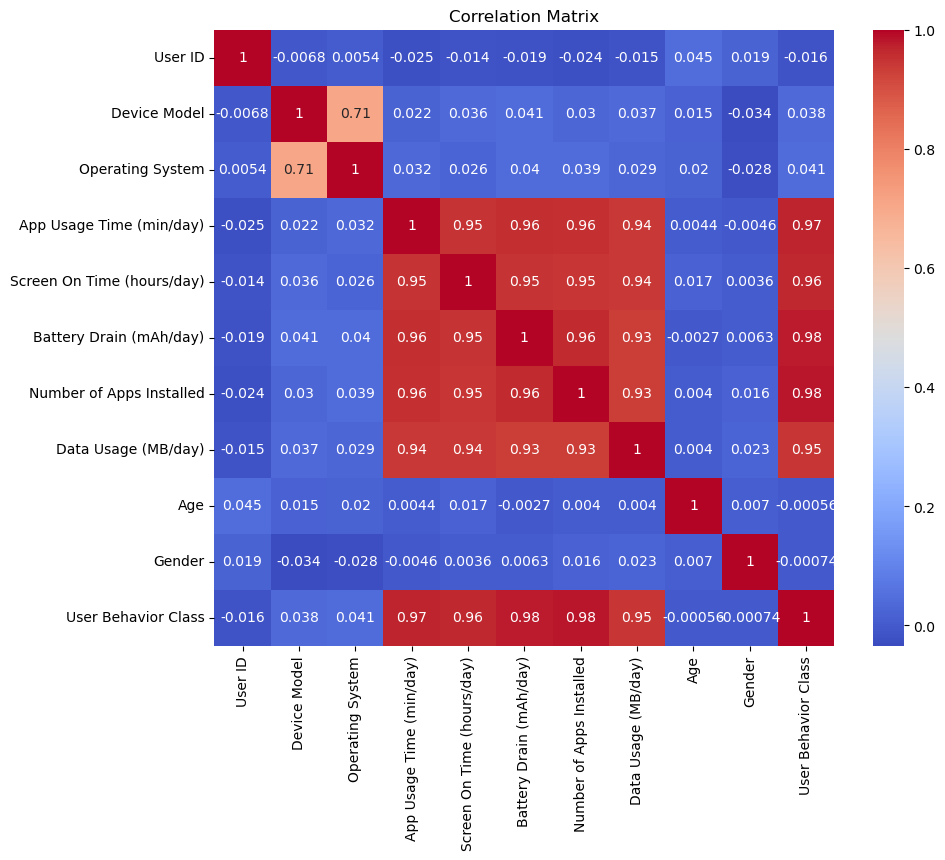

In [83]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [77]:
# Preprocess the data
label_encoder = LabelEncoder()
df['Device Model'] = label_encoder.fit_transform(df['Device Model'])
df['Operating System'] = label_encoder.fit_transform(df['Operating System'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Features and target variable
X = df.drop(columns=['User ID', 'User Behavior Class'])
y = df['User Behavior Class']


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140


Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]


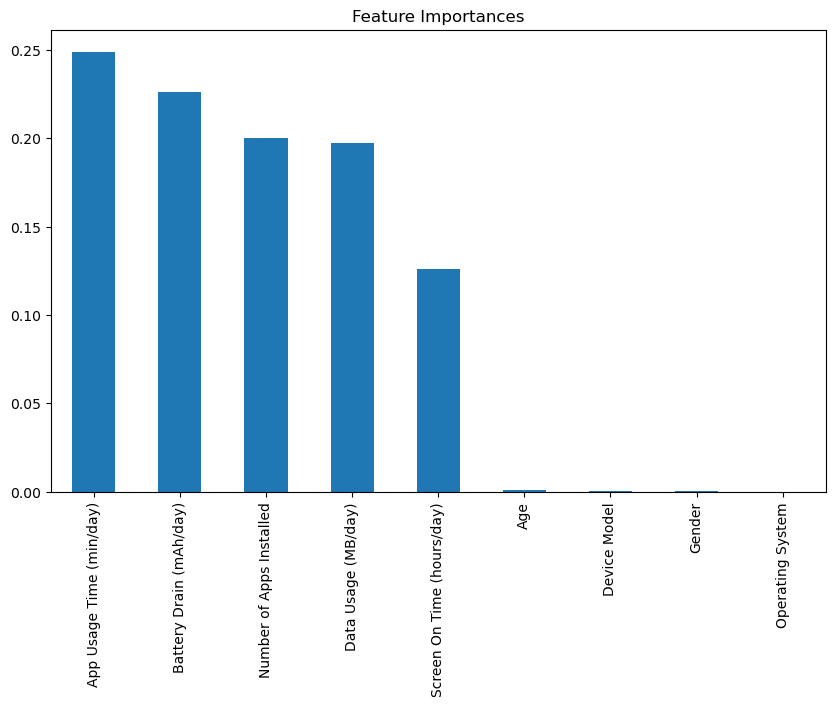

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()


In [ ]:
#\nStrong Feature Importance: Features such as App Usage Time, Number of Apps Installed, and Battery Drain were identified as the most significant predictors for the User Behavior Class, indicating their strong influence on user classification.

#High Model Accuracy: The Random Forest Classifier demonstrated solid performance in classifying user behavior, as shown by the detailed classification report with satisfactory precision, recall, and F1-scores for each class.

#Balanced Class Distribution: The dataset's balanced distribution across different User Behavior Classes ensured that the model was not biased toward any specific class, leading to more reliable classification results.

#Correlations Among Features: There were high correlations among key features like App Usage Time and Screen On Time, which were positively related to the target variable, confirming their relevance for understanding user behavior.